# Bank Marketing

In [142]:
#loading libraries
import pandas as pd 
import numpy as np                     
import seaborn as sns                   
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings("ignore")

In [5]:
#Load dataset
bank = pd.read_csv("/Users/shanpriyahome/Personal/Family Folders/Priya/Python/Dataset/Project/bank/bank-full.csv", delimiter=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Observation: There are 17 coloumns with no null values

In [7]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [9]:
bank.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [10]:
print("Shape of the dataset")
bank.shape

Shape of the dataset


(45211, 17)

In [11]:
print("[INFO] dataset summary")
print(bank.describe())

[INFO] dataset summary
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75% 

In [12]:
print(bank.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [13]:
print(bank.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


# Categorical Variables

In [14]:
cat_Var = pd.Categorical(bank)
print(cat_Var)

[age, job, marital, education, default, ..., campaign, pdays, previous, poutcome, y]
Length: 17
Categories (17, object): [age, balance, campaign, contact, ..., pdays, poutcome, previous, y]


In [15]:
print('\n')
print('________________________________________________________________________________')
print('Jobs:\n', bank['job'].unique())
print('________________________________________________________________________________')
print('Marital:\n', bank['marital'].unique())
print('________________________________________________________________________________')
print('Education:\n', bank['education'].unique())
print('________________________________________________________________________________')
print('\n')



________________________________________________________________________________
Jobs:
 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
________________________________________________________________________________
Marital:
 ['married' 'single' 'divorced']
________________________________________________________________________________
Education:
 ['tertiary' 'secondary' 'unknown' 'primary']
________________________________________________________________________________




In [16]:
print('Default:\n', bank['default'].unique())
print('\n')
print('Housing:\n', bank['housing'].unique())
print('\n')
print('Loan:\n', bank['loan'].unique())

Default:
 ['no' 'yes']


Housing:
 ['yes' 'no']


Loan:
 ['no' 'yes']


In [17]:
Y = (bank['y'] == 'yes')*1

# Job Deatils

Text(0.5, 1.03, 'JOBS OF THE CUSTOMERS')

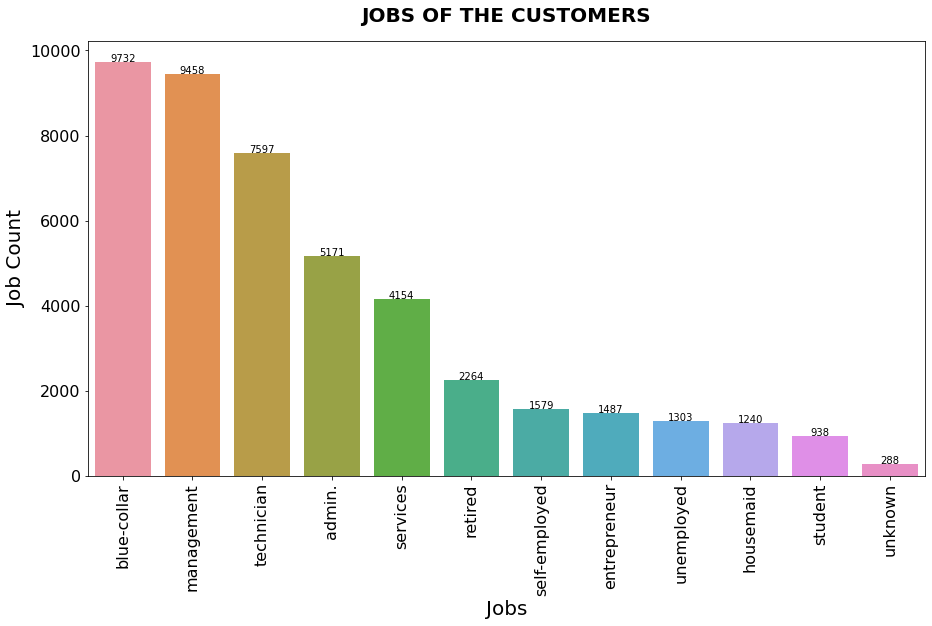

In [18]:
labels=bank['job'].value_counts().index
values=bank['job'].value_counts().values

plt.figure(figsize = (15, 8))
ax = sns.barplot(x=labels, y=values)
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, values[i],ha="center")
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    fmt = '%.0f'
    #plt.xticks(rotation='vertical')
    plt.xlabel('Jobs', fontsize=20)
plt.ylabel('Job Count', fontsize=20)
plt.title('JOBS OF THE CUSTOMERS', fontsize=20, y=1.03, weight='bold')

# Marital Status

Text(0.5, 1.03, 'MARITAL STATUS OF THE CUSTOMERS')

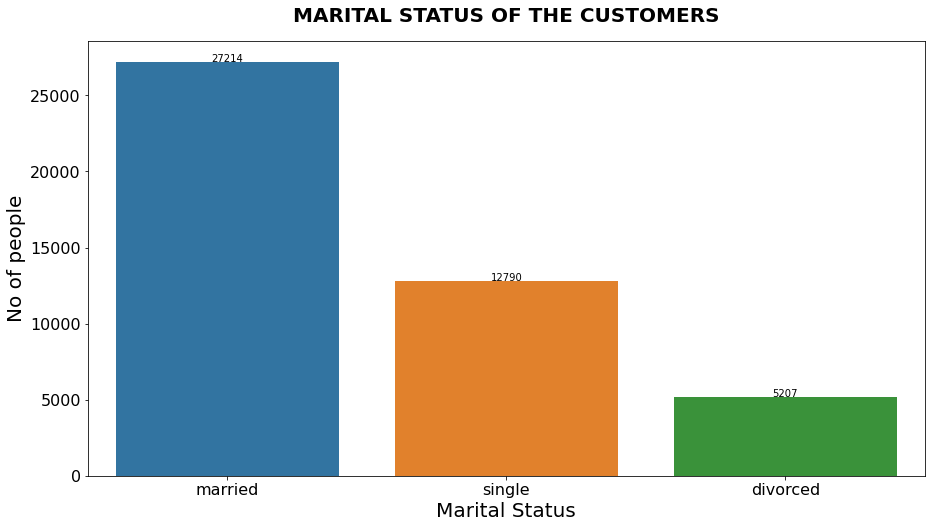

In [19]:
labels=bank['marital'].value_counts().index
values=bank['marital'].value_counts().values

plt.figure(figsize = (15, 8))
ax = sns.barplot(x=labels, y=values)
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, values[i],ha="center")
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    #plt.xticks(rotation='vertical')
    plt.xlabel('Marital Status', fontsize=20)
plt.ylabel('No of people', fontsize=20)
plt.title('MARITAL STATUS OF THE CUSTOMERS', fontsize=20, y=1.03, weight='bold')

Text(0.5, 1.03, 'EDUCATION OF THE CUSTOMERS')

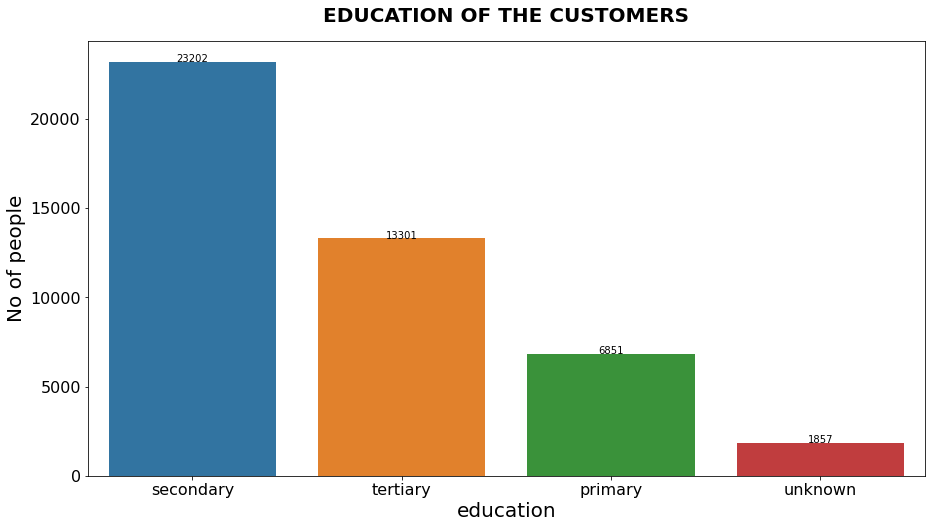

In [20]:
labels=bank['education'].value_counts().index
values=bank['education'].value_counts().values

plt.figure(figsize = (15, 8))
ax = sns.barplot(x=labels, y=values)
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, values[i],ha="center")
    #plt.xticks(rotation='vertical')
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    plt.xlabel('education', fontsize=20)
plt.ylabel('No of people', fontsize=20)
plt.title('EDUCATION OF THE CUSTOMERS', fontsize=20, y=1.03, weight='bold')

# Customer Contact Details:

In [94]:
print('Customer Contact Values:\n', bank['contact'].unique())

Customer Contact Values:
 ['unknown' 'cellular' 'telephone']


In [112]:
contact_labels = bank['contact'].value_counts().index
contact_values=bank['contact'].value_counts().values
contact_len= len(bank['contact'])
percentage_contact = []

In [113]:
for i in contact_values:
    print(i)
    i = (i/contact_len)*100
    percentage_contact.append(i)
    print(percentage_contact)

29285
[64.77405941032049]
13020
[64.77405941032049, 28.798301298356595]
2906
[64.77405941032049, 28.798301298356595, 6.427639291322908]


In [114]:
type(percentage_contact)

list

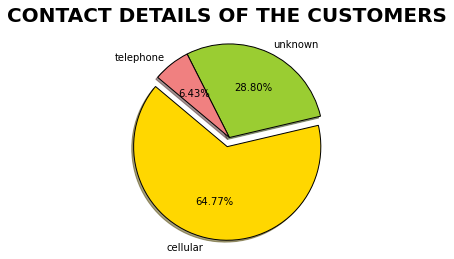

In [115]:
plt.title('CONTACT DETAILS OF THE CUSTOMERS', fontsize=20, y=1.03, weight='bold')
sizes = percentage_contact
#sizes = [215, 130, 215]
colors = ['gold', 'yellowgreen', 'lightcoral']
textprops = {"fontsize":10}
wedgeprops = {"linewidth": 1, 'width':1, "edgecolor":"k"}
explode = (0.1, 0, 0)  # explode 1st slice

#plt.pie(sizes, explode=explode, labels=contact_labels, colors=colors,autopct='%1.2f%%', shadow=True, startangle=140, textprops=textprops,wedgeprops = wedgeprops )
plt.pie(sizes, explode=explode, labels=contact_labels, colors=colors,autopct='%1.2f%%', shadow=True, startangle=140, textprops=textprops,wedgeprops = wedgeprops )
plt.axis('equal')
plt.show()

64.77405941032049
29285.0
28.798301298356595
13020.0
6.427639291322908
2906.0


Text(0.5, 1.03, 'CONTACT OF THE CUSTOMERS')

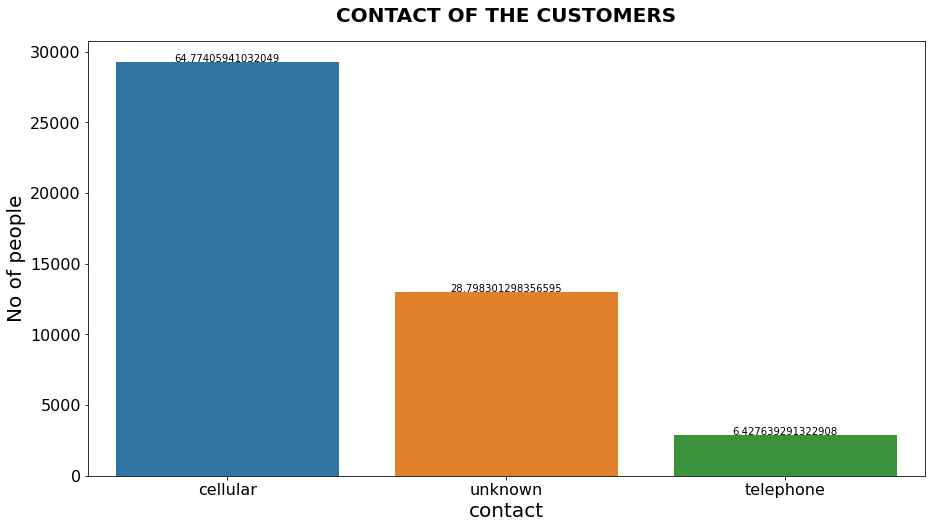

In [168]:
plt.figure(figsize = (15, 8))
ax = sns.barplot(x=contact_labels, y=contact_values)
for i, p in enumerate(ax.patches):
    print(percentage_contact[i])
    height = p.get_height()
    print(height)
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, percentage_contact[i], ha="center")
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    plt.xlabel('contact', fontsize=20)
plt.ylabel('No of people', fontsize=20)
plt.title('CONTACT OF THE CUSTOMERS', fontsize=20, y=1.03, weight='bold')

0.8
29285.0
-0.4 0
0.8
13020.0
0.6 0
0.8
2906.0
1.6 0


Text(0.5, 1.03, 'CONTACT OF THE CUSTOMERS')

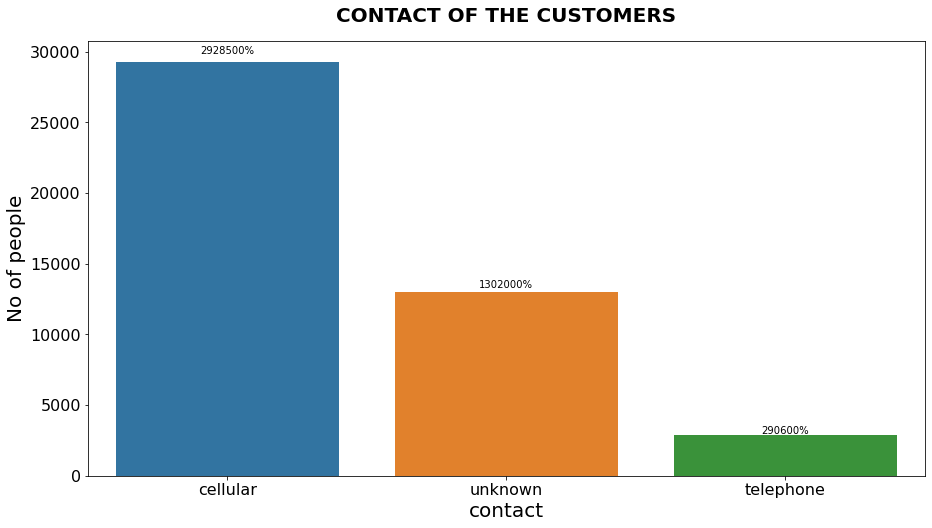

In [111]:
plt.figure(figsize = (15, 8))
ax = sns.barplot(x=contact_labels, y=contact_values)
for p in ax.patches:
    width = p.get_width()
    print(width)
    height = p.get_height()
    print(height)
    x, y = p.get_xy() 
    print(x,y)
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    plt.xlabel('contact', fontsize=20)
plt.ylabel('No of people', fontsize=20)
plt.title('CONTACT OF THE CUSTOMERS', fontsize=20, y=1.03, weight='bold')

# Numerical Variable

In [20]:
print(bank.select_dtypes(include=np.number).columns.tolist())

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


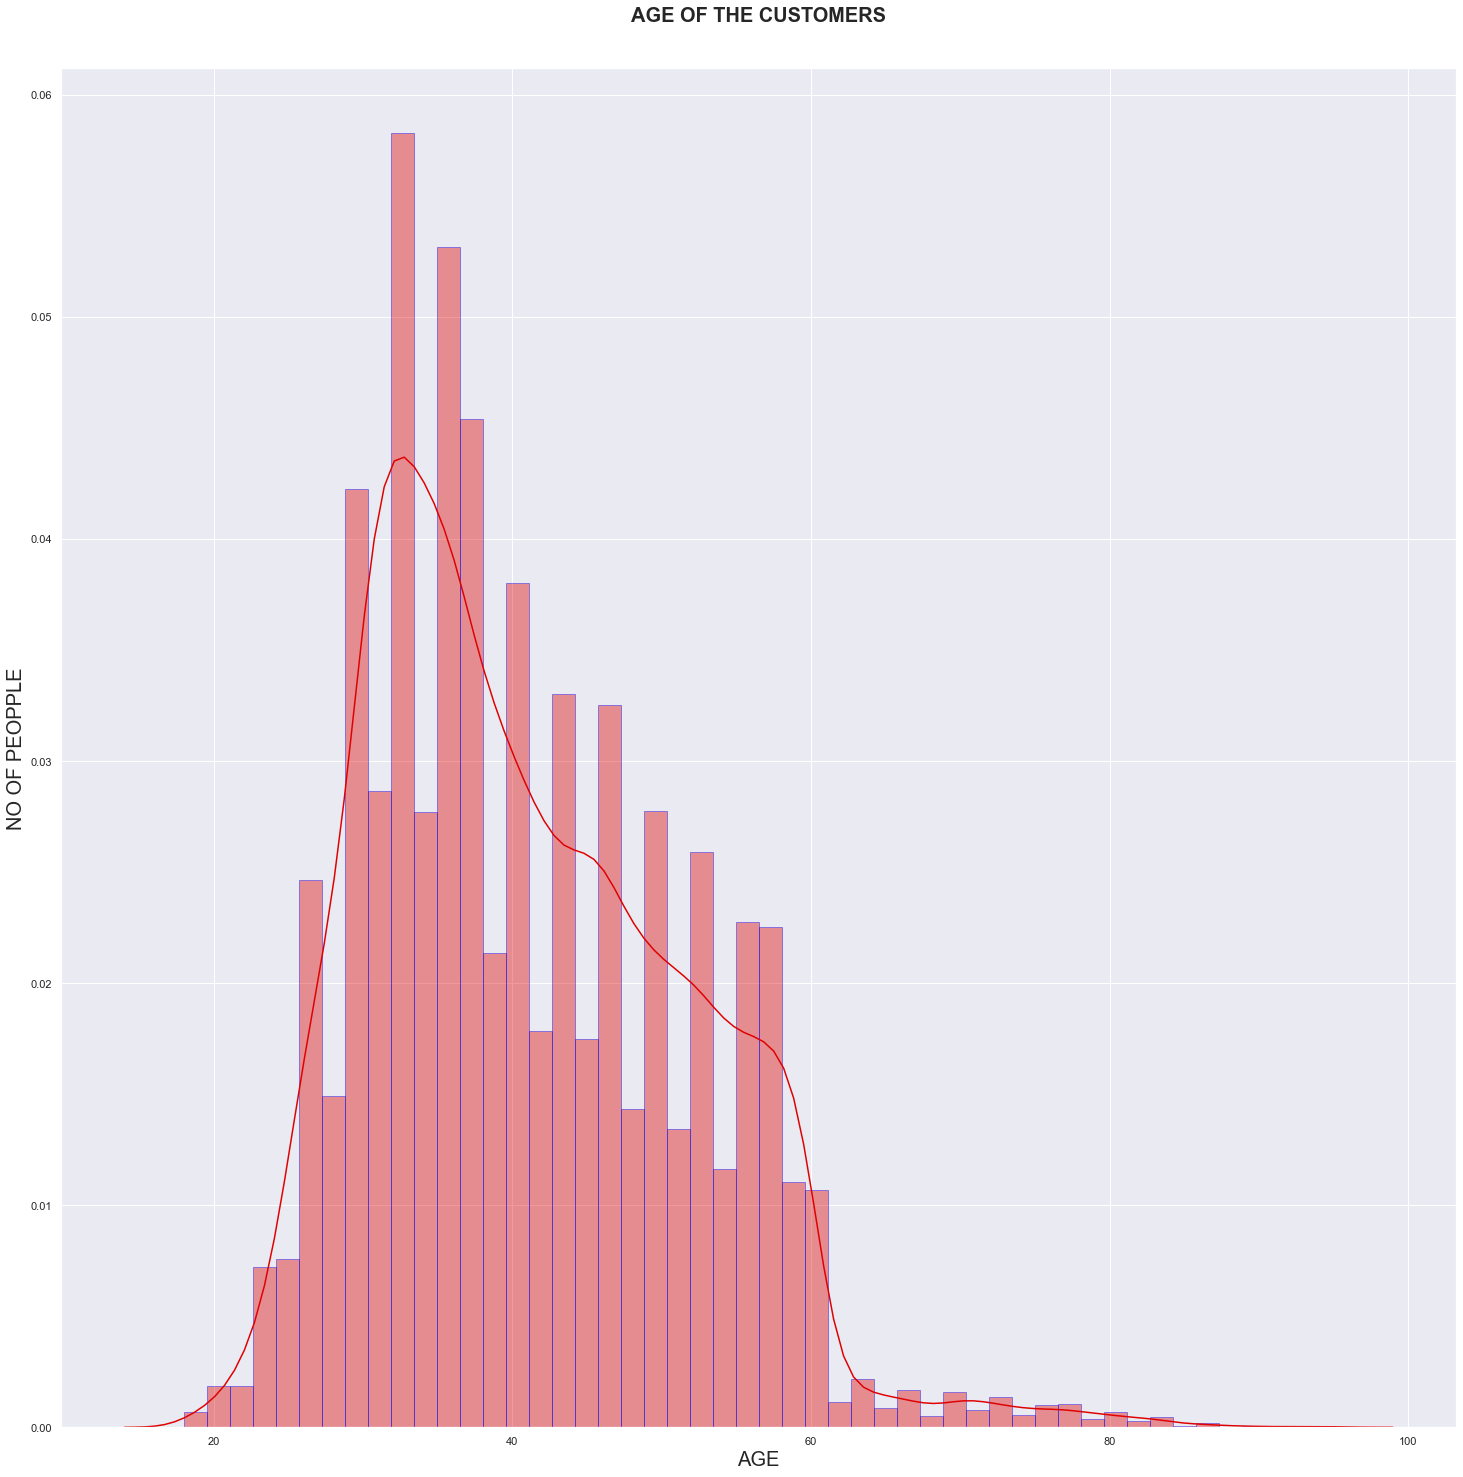

In [21]:
#sns.set(rc={"figure.figsize": (10, 10)}); np.random.seed(0)
sns.set(rc={"figure.figsize": (25, 25)})
ax = sns.distplot(bank['age'],color="#DF0101",hist_kws = {'edgecolor':'blue'})
plt.xlabel('AGE', fontsize=20)
plt.ylabel('NO OF PEOPPLE', fontsize=20)
plt.title('AGE OF THE CUSTOMERS', fontsize=20, y=1.03, weight='bold')
plt.show()

In [22]:
print('**************************************************')
print('\t Age Description \n')
print(bank['age'].describe())
print('**************************************************')

**************************************************
	 Age Description 

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64
**************************************************


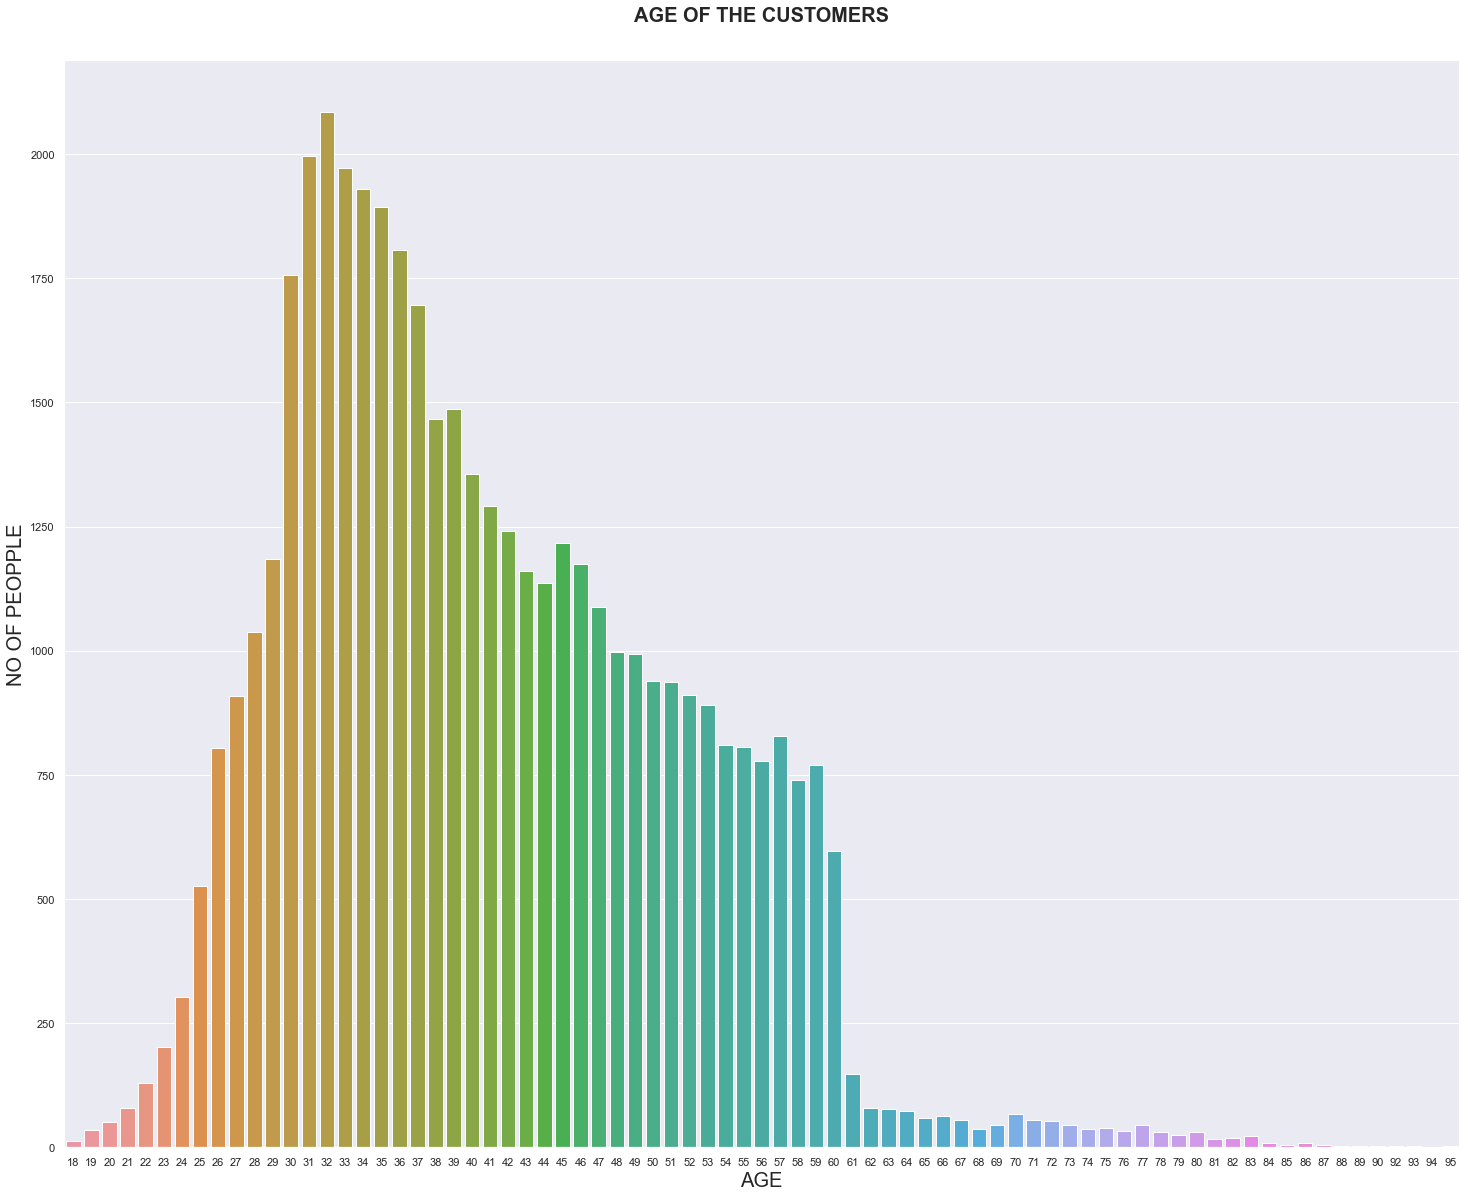

In [37]:
plt.subplots(figsize = (25, 20))
sns.countplot(bank['age'])
plt.xlabel('AGE', fontsize=20)
plt.ylabel('NO OF PEOPPLE', fontsize=20)
plt.title('AGE OF THE CUSTOMERS', fontsize=20, y=1.03, weight='bold')
plt.show()